In [2]:
#import pandas
import pandas as pd
# import matplotlib
import matplotlib.pyplot as plt
#import seaborn
import seaborn as sns
#import numpy
import numpy as np

In [3]:
#import Car Ads Dataset
car_dataset_url ='https://raw.githubusercontent.com/ankitone/sample_datasets/master/car_ad.csv'
car_ads = pd.read_csv(car_dataset_url, header=0)

Content

**Dataset contains 9576 rows and 10 variables with essential meanings:**

- car: manufacturer brand
- price: seller’s price in advertisement (in USD)
- body: car body type
- mileage: as mentioned in advertisement (‘000 Km)
- engV: rounded engine volume (‘000 cubic cm)
- engType: type of fuel (“Other” in this case should be treated as NA)
- registration: whether car registered in Ukraine or not
- year: year of production
- model: specific model name
- drive: drive type

In [16]:
print("Columns")
print("--------")
print(car_ads.columns)
print()

print("Data Type")
print("--------")
print(car_ads.dtypes)



Columns
--------
Index(['car', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'model', 'drive'],
      dtype='object')

Data Type
--------
car              object
price           float64
body             object
mileage           int64
engV            float64
engType          object
registration     object
year              int64
model            object
drive            object
dtype: object


##### Print all unique values with their counts of columns which are objects 

In [89]:
for col in car_ads.columns:
    if car_ads[col].dtype == object: 
        print("")
        print("---- %s ---" % col)
        print(car_ads[col].value_counts().head(17))
 



---- car ---
Volkswagen       936
Mercedes-Benz    921
BMW              694
Toyota           541
VAZ              489
Renault          469
Audi             457
Opel             400
Skoda            368
Nissan           368
Hyundai          367
Ford             350
Mitsubishi       327
Chevrolet        246
Daewoo           235
Kia              215
Honda            206
Name: car, dtype: int64

---- body ---
sedan        3646
crossover    2069
hatch        1252
van          1049
other         838
vagon         722
Name: body, dtype: int64

---- engType ---
Petrol    4379
Diesel    3013
Gas       1722
Other      462
Name: engType, dtype: int64

---- registration ---
yes    9015
no      561
Name: registration, dtype: int64

---- model ---
E-Class               199
A6                    172
Vito ����.            171
Kangoo ����.          146
Camry                 134
Lanos                 127
X5                    119
Caddy ����.           118
Octavia A5            108
Accord               

##### Describe all columns which are NOT objects

In [4]:
for col in car_ads.columns:
    if car_ads[col].dtype != object: 
        print(car_ads[col].name)

price
mileage
engV
year


In [19]:
car_ads.describe()

,price,mileage,engV,year
count,9576.000000,9576.000000,9142.000000,9576.000000
mean,15633.317316,138.862364,2.646344,2006.605994
std,24106.523436,98.629754,5.927699,7.067924
min,0.000000,0.000000,0.100000,1953.000000
25%,4999.000000,70.000000,1.600000,2004.000000
50%,9200.000000,128.000000,2.000000,2008.000000
75%,16700.000000,194.000000,2.500000,2012.000000
max,547800.000000,999.000000,99.990000,2016.000000


In [21]:
car_ads.dropna().describe()

,price,mileage,engV,year
count,8739.000000,8739.000000,8739.000000,8739.000000
mean,15733.542261,140.095434,2.588607,2006.609681
std,24252.904810,97.892213,5.416670,6.968947
min,0.000000,0.000000,0.100000,1959.000000
25%,5000.000000,71.000000,1.600000,2004.000000
50%,9250.000000,130.000000,2.000000,2008.000000
75%,16800.000000,195.500000,2.500000,2012.000000
max,547800.000000,999.000000,99.990000,2016.000000


In [98]:
car_ads.head(10)

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN
5,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full
6,Honda,6500.0,sedan,199,2.0,Petrol,yes,2003,Accord,front
7,Renault,10500.0,vagon,185,1.5,Diesel,yes,2011,Megane,front
8,Mercedes-Benz,21500.0,sedan,146,1.8,Gas,yes,2012,E-Class,rear
9,Mercedes-Benz,22700.0,sedan,125,2.2,Diesel,yes,2010,E-Class,rear


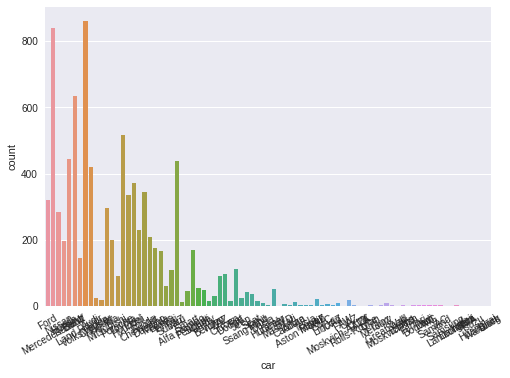

In [134]:
# PIE char for Drive
car_ads_nona = car_ads.dropna()
distribution = car_ads_nona['car'].groupby(car_ads_nona['car']).count()
labels = car_ads_nona['car'].unique()


g = sns.countplot(x="car", data=car_ads_nona);
_= g.set_xticklabels(labels, rotation=30)



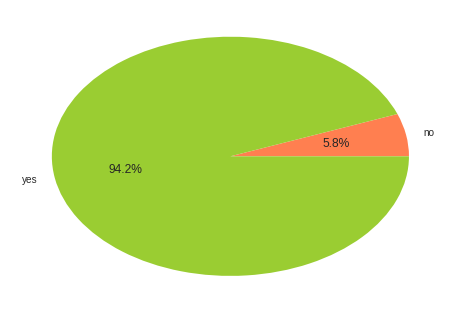

In [101]:
# PIE char for Drive
car_ads_nona = car_ads.dropna()
distribution = car_ads_nona['registration'].groupby(car_ads_nona['registration']).count()
labels = car_ads_nona['registration'].unique()
colors = ['coral', 'yellowgreen', 'gold', 'lightskyblue', 'pink', 'green', 'magenta']
labels.sort()
_ = plt.pie(distribution, labels=labels, autopct='%.1f%%', colors=colors, radius=1)

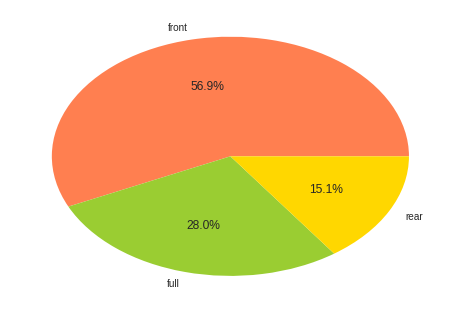

In [100]:
# PIE char for Drive
car_ads_nona = car_ads.dropna()
distribution = car_ads_nona['drive'].groupby(car_ads_nona['drive']).count()
labels = car_ads_nona['drive'].unique()
colors = ['coral', 'yellowgreen', 'gold', 'lightskyblue', 'pink', 'green', 'magenta']
labels.sort()
_ = plt.pie(distribution, labels=labels, autopct='%.1f%%', colors=colors, radius=1)

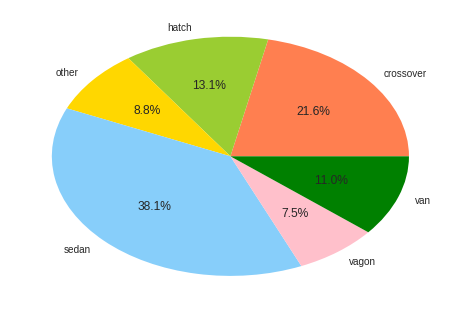

In [93]:
# PIE char for Body
distribution = car_ads['body'].groupby(car_ads['body']).count()
labels = car_ads['body'].unique()
colors = ['coral', 'yellowgreen', 'gold', 'lightskyblue', 'pink', 'green', 'magenta']
labels.sort()
_ = plt.pie(distribution, labels=labels, autopct='%.1f%%', colors=colors, radius=1)

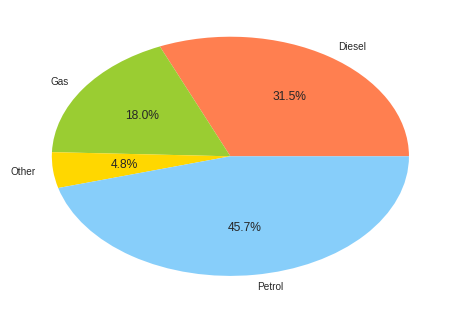

In [60]:
# PIE char for Engine Types
distribution = car_ads['engType'].groupby(car_ads['engType']).count()
labels = car_ads['engType'].unique()
colors = ['coral', 'yellowgreen', 'gold', 'lightskyblue']
labels.sort()
_ = plt.pie(distribution, labels=labels, autopct='%.1f%%', colors=colors, radius=1)

In [23]:
#for col in car_ads.columns:
   # if car_ads[col].dtype != object: 
       # print("")
       # print("---- %s ---" % col)
       # print(car_ads[col].describe())
       # print("--After Dropping NaN--")
       # print(car_ads.dropna(how='any')[col].describe())
       # print(car_ads[col].describe()['mean'])

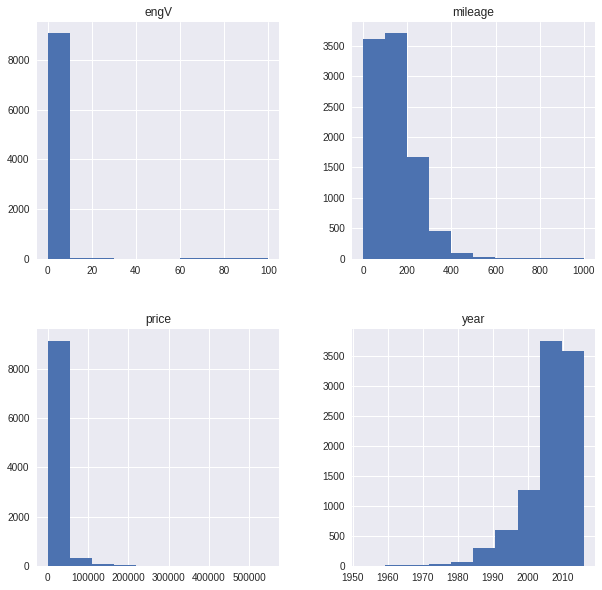

In [38]:
pd.DataFrame.hist(car_ads, figsize = [10,10])
plt.show()

97


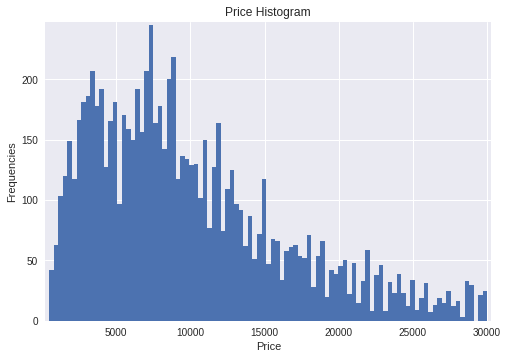

In [10]:
sns.set()
n_bins = int(np.sqrt(len(car_ads['price'])))
print(n_bins)
# Plot histogram of price
_ = plt.hist(car_ads.price[(car_ads.price > 500) & (car_ads.price < 30000)], bins=n_bins)
plt.xlabel('Price')
plt.ylabel('Frequencies')
plt.title('Price Histogram')
plt.margins(0.01)
# Show histogram
plt.show()


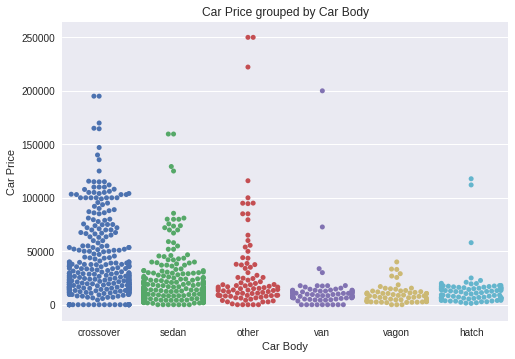

In [7]:
sns.set()
#Plot swarm plot of price
_ = sns.swarmplot(x=car_ads.head(1000).body, y=car_ads.head(1000).price)
_ = plt.xlabel('Car Body')
_ = plt.ylabel('Car Price')
_ = plt.title('Car Price grouped by Car Body')

plt.show()

## ECDF
An ECDF graph is very usefull to have a summary analysis of a big sample of very different values, but the first contact is quite surprising

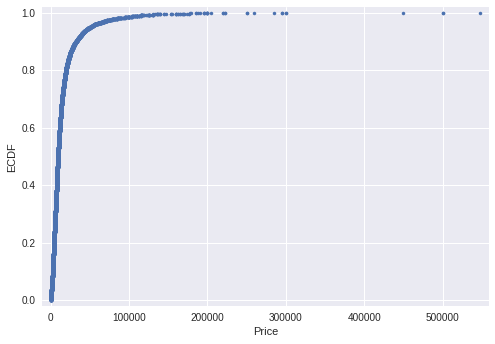

In [10]:
#ser = ser.sort_values()
def ecdf(dataSer):
    x = dataSer.sort_values()
    n = len(x)
    y = np.arange(1, n+1) / n
    return x,y


x_vers, y_vers = ecdf(car_ads.price)
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')
# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('Price')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()



- almost all cars have more than 5000 and less than 100,000 price
- 80% of the cars are expensive than 2000

### Comparisons of ECDFs

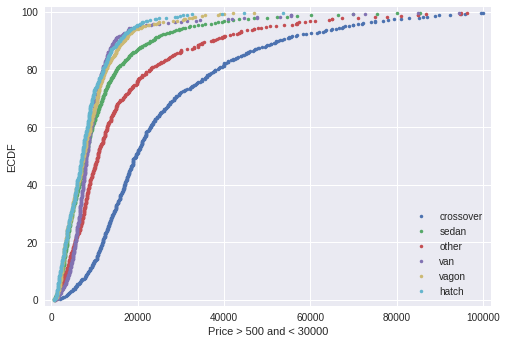

In [11]:
#print(car_ads.price[car_ads.body == 'crossover'])
#ser = ser.sort_values()
def ecdf(dataSer):
    x = dataSer.sort_values()
    n = len(x)
    y = np.arange(1, n+1) / n
    return x,y

def percentile_calc(dataSer, percentiles):
    ptiles_vers = np.percentile(dataSer, percentiles)
    return ptiles_vers
    
    

# Get all unique values of car Bodies
BodyArr = car_ads.body.unique()
for body in BodyArr:
    #print(body)
    subset_cars = car_ads.price[(car_ads.price > 500) & (car_ads.price < 100000)]
    ## We are taking a subset of the cars price since we 
    ## found most of the cars lied in that range
    percentiles = np.arange(0, 100, .2)
    ptiles_vers = percentile_calc(subset_cars[car_ads.body == body], percentiles)
    y_vers = percentiles
    x_vers = ptiles_vers

    
    #x_vers, y_vers = ecdf(subset_cars[car_ads.body == body])
    _ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')
    # Make the margins nice
    plt.margins(0.02)

    # Label the axes
    _ = plt.legend(BodyArr, loc='lower right')
    _ = plt.xlabel('Price > 500 and < 30000')
    _ = plt.ylabel('ECDF')

    # Display the plot
plt.show()





We can clearly see crossover are more expensive

### Boxplots

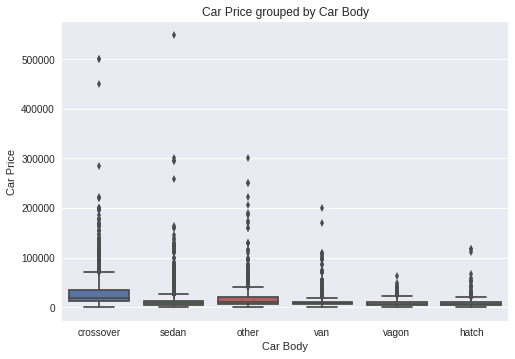

In [4]:
_ = sns.boxplot(x=car_ads.body, y=car_ads.price )
_ = plt.xlabel('Car Body')
_ = plt.ylabel('Car Price')
_ = plt.title('Car Price grouped by Car Body')

plt.show()

Since the Uppper percentiles of all box plots is less than 60,000. Let's
set th eupper limt of car price at 60,000 for thee box plot. 

In [ ]:
_ = sns.boxplot(x=car_ads.body, y=car_ads.price[(car_ads.price < 60000) & (car_ads.price > 500)] )
_ = plt.xlabel('Car Body')
_ = plt.ylabel('Car Price')
_ = plt.title('Car Price grouped by Car Body')

plt.show()

## Scatterplot
Corelation between two qunatitative variables

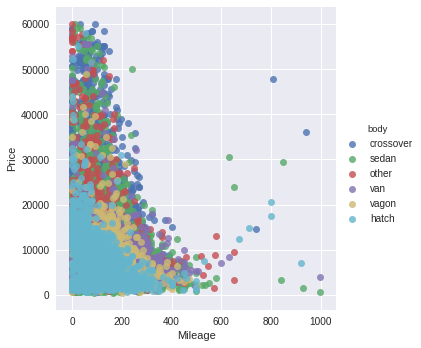

In [5]:
car_subset = car_ads[(car_ads.price>500) & (car_ads.price<60000)]
_ = sns.lmplot('mileage', 'price', data=car_subset, hue='body', fit_reg=False)
_ = plt.xlabel('Mileage')
_ = plt.ylabel('Price')
#_ = plt.legend(BodyArr, loc='lower right')
plt.show()

In [ ]:
car_subset = car_ads[(car_ads.price>500) & (car_ads.price<60000)]
_ = sns.lmplot('year', 'price', data=car_subset, hue='body', fit_reg=False)
_ = plt.xlabel('year')
_ = plt.ylabel('Price')
#_ = plt.legend(BodyArr, loc='lower right')
plt.show()

In [ ]:
car_subset = car_ads[(car_ads.price>500) & (car_ads.price<60000)]
#_ = sns.lmplot('year', 'price', data=car_subset, hue='body', fit_reg=False)
#_ = plt.xlabel('year')
#_ = plt.ylabel('Price')
#_ = plt.legend(BodyArr, loc='lower right')

#g = sns.FacetGrid(car_subset, col="body",  row="engType")
g = sns.FacetGrid(car_subset, col="engType", row='body')
g = g.map(plt.scatter, "year", "mileage", edgecolor="w")
plt.show()